In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [5]:
df_train.head(3)

,index,image,status_code,target
0,34,a01-000u-04-05,ok,the
1,86,a01-000x-03-07,ok,the
2,123,a01-003-02-02,ok,the


In [6]:
def get_unique_targets(df):
    unique_df = pd.DataFrame(df['target'].value_counts())
    reset_df = unique_df.reset_index()
    reset_df.rename(columns = {'index': 'word', 'target': 'count'}, inplace = True)
    return reset_df

In [22]:
unique_train = get_unique_targets(df_train)
unique_test = get_unique_targets(df_test)

In [20]:
unique_train.head()

,word,count
0,the,1876
1,of,992
2,to,846
3,and,657
4,a,652


In [24]:
unique_test.head()

,word,count
0,the,274
1,of,156
2,and,137
3,a,107
4,to,94


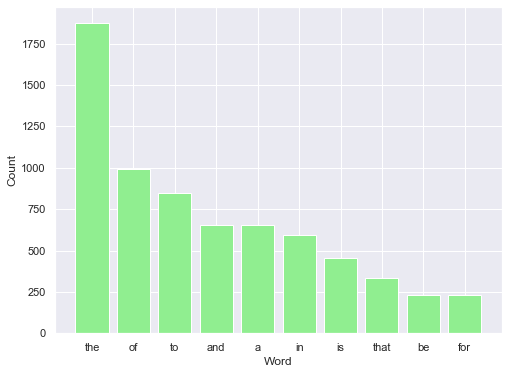

In [34]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(unique_train['word'][:10], unique_train['count'][:10], color = 'lightgreen')
plt.xlabel('Word', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.savefig('train_top10.png', bbox_inches = 'tight')


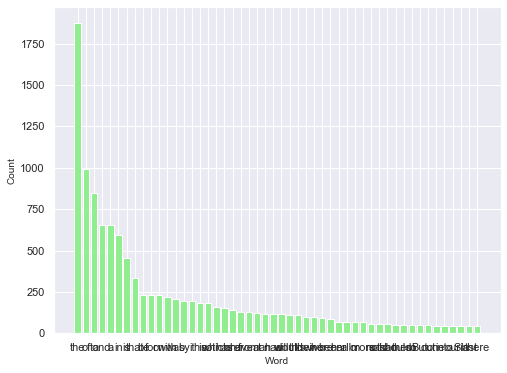

In [38]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(unique_train['word'][:50], unique_train['count'][:50], color = 'lightgreen')
plt.xlabel('Word', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()


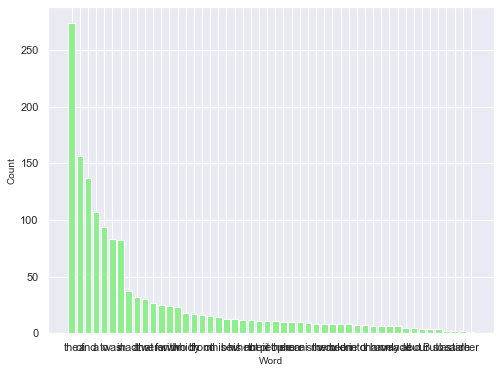

In [37]:
fig, ax = plt.subplots(figsize = (8,6))

sns.set(style = 'darkgrid')

plt.bar(unique_test['word'][:50], unique_test['count'][:50], color = 'lightgreen')
plt.xlabel('Word', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.show()
